 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#GDAL-data-type" data-toc-modified-id="GDAL-data-type-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GDAL data type</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#The-GeoTransform" data-toc-modified-id="The-GeoTransform-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The GeoTransform</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#Try-it-out-in-some-other-places!" data-toc-modified-id="Try-it-out-in-some-other-places!-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Try it out in some other places!</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#The-projection" data-toc-modified-id="The-projection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The projection</a></span></li><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#Saving-files" data-toc-modified-id="Saving-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Saving files</a></span></li><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#Reprojecting-things" data-toc-modified-id="Reprojecting-things-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reprojecting things</a></span></li><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#Reprojecting-whole-rasters" data-toc-modified-id="Reprojecting-whole-rasters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reprojecting whole rasters</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#Using-the-Python-bindings" data-toc-modified-id="Using-the-Python-bindings-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using the Python bindings</a></span></li><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#Using-command-line-tools" data-toc-modified-id="Using-command-line-tools-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Using command line tools</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Chapter4_GDAL/GDAL_Python_bindings.ipynb#Creating-a-mask-from-a-vector" data-toc-modified-id="Creating-a-mask-from-a-vector-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Creating a mask from a vector</a></span></li></ul></div>

# GDAL and OGR libraries

In the previous session, we used the GDAL library to open HDF files. GDAL is not limited to a single file format, but can actually cope with many different raster file formats semalessly. For *vector* data (i.e., data that is stored by features, each being made up of fields containing different types of information, one of them being a *geometry*, such as polygon, line or point), GDAL has a sister library called OGR. The usefulness of these two libraries is that they allow the user to deal with many of the different file formats in a consistent way. 

It is important to note that both GDAL and OGR come with a suite of command line tools that let you do many complex tasks on the command line directly. A listing of the GDAL command line tools is available [here](http://www.gdal.org/gdal_utilities.html), but bear in mind that many blogs etc. carry out examples of using GDAL tools in practice. For OGR, most of the library can be accessed using [ogr2ogr](http://www.gdal.org/ogr2ogr.html), but as usual, you might find more useful information on [blogs](http://www.bostongis.com/PrinterFriendly.aspx?content_name=ogr_cheatsheet) etc.

## GDAL data type

GDAL provides a very handy way of dealing with raster data in many different formats, not only by making access to the data easy, but also abstracting the nuances and complications of different file formats. In GDAL, a raster file is made up of the actual raster data (i.e.,  the values of each pixel of LAI that we saw before), and of some *metadata*. Metadata is data that describes something, and in this case it could be the projection, the location of corners and pixel spacing, etc.

### The GeoTransform

GDAL stores information about the location of each pixel using the GeoTransform. The GeoTransform contains the coordinates (in some projection) of the upper left (UL) corner of the image (taken to be the **borders of the pixel** in the UL corner, not the center), the pixel spacing and an additional rotation. By knowing these figures, we can calculate the location of each pixel in the image easily. Let's see how this works with an easy example. We have prepared a GeoTIFF file (GeoTIFF is the more ubiquitous file format for EO data) of the MODIS landcover product for the UK. The data has been extracted from the HDF-EOS files that are similar to the LAI product that we have seen before, and converted. The file is [`lc_h17v03.tif`](https://raw.github.com/jgomezdans/geogg122/master/ChapterX_GDAL/lc_h17v03.tif). We will open the file in Python, and have a look at finding a particular location.

Assume we are interested in locating [Kinder Scout](http://toolserver.org/~rhaworth/os/coor_g.php?pagename=Kinder_Scout&params=SK086875_region%3AGB_scale%3A25000), a moorland in the Peak District National Park. Its coordinates are 1.871417W, 53.384726N. In the MODIS integerised sinusoidal projection, the coordinates are (-124114.3, 5936117.4) (you can use the [MODLAND tile calculator website](http://landweb.nascom.nasa.gov/cgi-bin/developer/tilemap.cgi) to do this calculation yourself).

In [1]:
import gdal # Import GDAL library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# have to make sure have access to gdal data files 
import os
if 'GDAL_DATA' not in os.environ:
    os.environ["GDAL_DATA"] = '/opt/anaconda/share/gdal'


g = gdal.Open ( "lc_h17v03.tif" ) # Open the file
if g is None:
    print "Could not open the file!"
geo_transform = g.GetGeoTransform ()
print geo_transform
print g.RasterXSize, g.RasterYSize

(-1111950.519667, 463.3127165279167, 0.0, 6671703.118, 0.0, -463.3127165279165)
2400 2400


In the previous code, we open the file (we just use the filename), and then query the object for its GeoTransform, which we then print out. The 6-element tuple comprises 

1. The Upper Left *easting* coordinate (i.e., *horizontal*)
2. The E-W pixel spacing
3. The rotation (0 degrees if image is "North Up")
4. The Upper left *northing* coordinate (i.e., *vertical*)
5. The rotation (0 degrees)
6. The N-S pixel spacing, negative as we will be counting from the UL corner

We have also seen that the dataset is of size 2400x2400, using `RasterXSize` and `RasterYSize`. The goal is to find the pixel number $(i,j), \;\;0\le i,j < 2400$ that corresponds to Kinder Scout. To do this, we use the following calculations:

In [2]:
pixel_x = (-124114.3 - geo_transform[0])/geo_transform[1] \
        # The difference in distance between the UL corner (geot[0] \
        #and point of interest. Scaled by geot[1] to get pixel number

pixel_y = (5936117.4 - geo_transform[3])/(geo_transform[5]) # Like for pixel_x, \
        #but in vertical direction. Note the different elements of geot \
        #being used

print pixel_x, pixel_y

2132.11549009 1587.66572071


If you can't be bothered doing those simple calculations, GDAL offers you a couple of methods to do the same thing already: you can use `ApplyGeoTransform`, a method that takes:
* A geotransform array
* The x co-ordinate
* The y co-ordinate

Using the standard geo-transform, you can go from pixel location to projected units:

In [3]:
print gdal.ApplyGeoTransform(geo_transform, pixel_x, pixel_y)

[-124114.30000000016, 5936117.4]


If we want to go the other way (from projected units to pixel row/column pair) we can "invert" the geotransform as follows:

In [4]:
print gdal.ApplyGeoTransform(gdal.InvGeoTransform(geo_transform), -124114.3, 5936117.4)

[2132.115490094644, 1587.6657207091303]


So the pixel number is a floating point number, which we might need to round off as an integer. Let's plot the entire raster map (with minimum value 0 to ignore the ocean) using [`plt.imshow`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) and plot the location of Kinder Scout using [`plt.plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plt). We will also use [`plt.annotate`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate) to add a label with an arrow:

([], <a list of 0 Text yticklabel objects>)

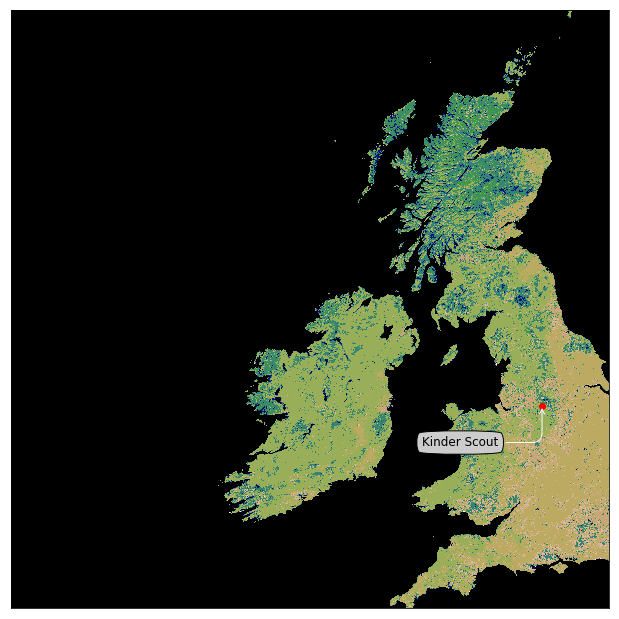

In [5]:
lc = g.ReadAsArray() # Read raster data
# Now plot the raster data using gist_earth palette
plt.figure(figsize=(11,11))
plt.imshow ( lc, interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth )
# Plot location of our area of interest as a red dot ('ro')
plt.plot ( pixel_x, pixel_y, 'ro')
# Annotate
plt.annotate('Kinder Scout', xy=(pixel_x, pixel_y),  \
        xycoords='data', xytext=(-120, -40), \
        textcoords='offset points',  size=12, \
        bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), \
        arrowprops=dict(arrowstyle="->", \
        connectionstyle="angle,angleA=0,angleB=-90,rad=10", \
        color='w'), )
# Remove vertical and horizontal ticks
plt.xticks([])
plt.yticks([])

#### Try it out in some other places!

<div class="alert alert-block alert-success">
Find the longitude and latitude of some places of interest in the British isles (West of Greenwich!) and using the MODLAND MODIS tile calculator and the geotransform, repeat the above experiment. Note that the [MODIS calculator](http://landweb.nascom.nasa.gov/cgi-bin/developer/tilemap.cgi) calculates both the projected coordinates in the MODIS sinusoidal projection, as well as the pixel number, so it is a helpful way to check whether you got the right result.
<td>
</td>
<table>
<tr>
<th>Park name</th><th>Longitude [deg]</th><th>Latitude [deg]</th>
</tr>
<tr>
<td>Dartmoor national park</td>	<td>-3.904</td><td>	50.58</td>
</tr>
<tr>
<td>New forest national park</td><td>	-1.595</td><td>	50.86</td>
</tr>
<tr>
<td>Exmoor national park</td><td>	-3.651</td><td>	51.14</td>
</tr>
<tr>
<td>Pembrokeshire coast national park</td><td>	-4.694</td><td>	51.64</td>
</tr>
<tr>
<td>Brecon beacons national park	</td><td>-3.432</td><td>	51.88</td>
</tr>
<tr>
<td>Pembrokeshire coast national park</td><td>	-4.79</td><td>	51.99</td>
</tr>
<tr>
<td>Norfolk and suffolk broads	</td><td>1.569</td><td>	52.62</td>
</tr>
<tr>
<td>Snowdonia national park</td><td>	-3.898	</td><td>52.9</td>
</tr>
<tr>
<td>Peak district national park	</td><td>-1.802	</td><td>53.3</td>
</tr>
<tr>
<td>Yorkshire dales national park</td><td>	-2.157	</td><td>54.23</td>
</tr>
<tr>
<td>North yorkshire moors national park	</td><td>-0.8855	</td><td>54.37</td>
</tr>
<tr>
<td>Lake district national park	</td><td>-3.084	</td><td>54.47</td>
</tr>
<tr>
<td>Galloway forest park	</td><td>-4.171	</td><td>54.87</td>
</tr>
<tr>
<td>Northumberland national park	</td><td>-2.228	</td><td>55.28</td>
</tr>
<tr>
<td>Loch lomond and the trossachs national park	</td><td>-4.593	</td><td>56.24</td>
</tr>
<tr>
<td>Tay forest park	</td><td>-4.025</td><td>	56.59</td>
</tr>
<tr>
<td>Cairngorms national park	</td><td>-3.545	</td><td>57.08</td>
</tr>
</table>
</div>

## The projection

Projections in GDAL objects are stored can be accessed by querying the dataset using the `GetProjection()` method. If we do that on the currently opened dataset (stored in variable `g`), we get:

In [6]:
print g.GetProjection()

PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not_specified_based_on_custom_spheroid",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]


The above is the description of the projection (in this case, MODIS sinusoidal) in `WKT` (well-known text) format. There are a number of different ways of specifying projections, the most important being

* WKT
* Proj4
* EPSG codes

The site [spatialreference.org](http://spatialreference.org) allows you to search a large collection of projections, and get the representation that you want to use. 

## Saving files

So far, we have read data from files, but lets see how we can save raster data **to** a new file. We will use the previous landcover map as an example. We will write a method to save the data in a format provided by the user. The procedure is fairly straightforward: we get a handler to a driver (e.g. a GeoTIFF or Erdas Imagine format), we create the output file (giving a filename, number of rows, columns, bands, the data type), and then add the relevant metadata (projection, geotransform, ...). We then select a band from the output and copy the array that we want to write to that band.

In [7]:
g = gdal.Open ( "lc_h17v03.tif" ) # Open original file
# Get the x, y and number of bands from the original file
x_size, y_size, n_bands = g.RasterXSize, g.RasterYSize, g.RasterCount
data = g.ReadAsArray ()
driver = gdal.GetDriverByName ( "HFA" ) # Get a handler to a driver
                                        # Maybe try "GeoTIFF" here
# Next line creates the output dataset with
# 1. The filename ("test_lc_h17v03.img")
# 2. The raster size (x_size, y_size)
# 3. The number of bands
# 4.The data type (in this case, Byte.
#     Other typical values might be gdal.GDT_Int16 
#     or gdal.GDT_Float32)

dataset_out = driver.Create ( "test_lc_h17v03.img", x_size, y_size, n_bands, 
                             gdal.GDT_Byte )
# Set the output geotransform by reading the input one
dataset_out.SetGeoTransform ( g.GetGeoTransform() )
# Set the output projection by reading the input one
dataset_out.SetProjection ( g.GetProjectionRef() )
# Now, get band # 1, and write our data array. 
# Note that the data array needs to have the same type
# as the one specified for dataset_out
dataset_out.GetRasterBand ( 1 ).WriteArray ( data )
# This bit forces GDAL to close the file and write to it
dataset_out = None

The output file should hopefully exist in this directory. Let's use [`gdalinfo`](http://www.gdal.org/gdalinfo.html) to find out about it

In [8]:
!gdalinfo test_lc_h17v03.img

Driver: HFA/Erdas Imagine Images (.img)
Files: test_lc_h17v03.img
Size is 2400, 2400
Coordinate System is:
PROJCS["Sinusoidal",
    GEOGCS["GCS_Unknown datum based upon the custom spheroid",
        DATUM["Not_specified_based_on_custom_spheroid",
            SPHEROID["Custom_spheroid",6371007.181,0],
            TOWGS84[0,0,0,-0,-0,-0,0]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.017453292519943295]],
    PROJECTION["Sinusoidal"],
    PARAMETER["longitude_of_center",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (-1111950.519667000044137,6671703.117999999783933)
Pixel Size = (463.312716527916677,-463.312716527916507)
Corner Coordinates:
Upper Left  (-1111950.520, 6671703.118) ( 20d 0' 0.00"W, 60d 0' 0.00"N)
Lower Left  (-1111950.520, 5559752.598) ( 15d33'26.06"W, 50d 0' 0.00"N)
Upper Right (       0.000, 6671703.118) (  0d 0' 0.01"E, 60d 0' 0.00"N)
Lower Right (       0.000, 5559752.598) (  0d 0' 0.01"E, 50d 0' 0.00"

So the previous code works. Since this is something we typically do (read some data from one or more files, manipulate it and save the result in output files), it makes a lot of sense to try to put this code in a method that is more or less generic, that we can test and then re-use. Here's a first attempt at it:

In [9]:
def save_raster ( output_name, raster_data, dataset, driver="GTiff" ):
    """
    A function to save a 1-band raster using GDAL to the file indicated
    by ``output_name``. It requires a GDAL-accesible dataset to collect 
    the projection and geotransform.
    
    Parameters
    ----------
    output_name: str
        The output filename, with full path and extension if required
    raster_data: array
        The array that we want to save
    dataset: str
        Filename of a GDAL-friendly dataset that we want to use to
        read geotransform & projection information
    driver: str
        A GDAL driver string, like GTiff or HFA.
    """
    
    # Open the reference dataset
    g = gdal.Open ( dataset )
    # Get the Geotransform vector
    geo_transform = g.GetGeoTransform ()
    x_size = g.RasterXSize # Raster xsize
    y_size = g.RasterYSize # Raster ysize
    srs = g.GetProjectionRef () # Projection
    # Need a driver object. By default, we use GeoTIFF
    driver = gdal.GetDriverByName ( driver )
    dataset_out = driver.Create ( output_name, x_size, y_size, 1, \
            gdal.GDT_Float32 )
    dataset_out.SetGeoTransform ( geo_transform )
    dataset_out.SetProjection ( srs )
    dataset_out.GetRasterBand ( 1 ).WriteArray ( \
            raster_data.astype(np.float32) )
    dataset_out = None

<div class="alert alert-block alert-success">
Now try modifying that method so that you can

1. Select the output data type diffrent to Float32
2. Provide a given projection and geotransform (e.g. if you don't have a GDAL filename)
</div>

## Reprojecting things

Previously, we have used the [MODLAND grid converter](http://landweb.nascom.nasa.gov/cgi-bin/developer/tilemap.cgi) site to go from latitude/longitude pairs to MODIS projection. However, in practice, we might want to use a range of different projections, and convert many points at the same time, so how do we go about that?

In GDAL/OGR, most projection-related tools are in the `osr` package, which needs to be imported like e.g. `gdal` itself. The main tools are the `osr.SpatialReference` object, which defines a projection object (with no projection to start with), and the `osr.CoordinateTransformation` object. 

Once you instantiate `osr.SpatialReference`, it holds no projection information. You need to use methods to set it up, using EPSG codes, Proj4 strings, or whatever. These methods typically start by `ImportFrom` (e.g. `ImportFromEPSG`, `ImportFromProj4`, ...).

The `CoordinateTransformation` requires a source and destination spatial references that have been configured. Once this is done, it expose the method `TransformPoint` to convert coordinates from the source to the destination projection.

Let's see how this works by converting some latitude/longitude pairs to the Ordnance Survey's [National Grid](http://en.wikipedia.org/wiki/Ordnance_Survey_National_Grid) projection. The projection is also available in [spatialreference.org](http://spatialreference.org/ref/epsg/27700/), where we can gleam its EPSG code (27700). The EPSG code for longitude latitude is [4326](http://spatialreference.org/ref/epsg/4326/). Let's see this in practice:


In [10]:
from osgeo import osr, ogr

# Define the source projection, WGS84 lat/lon. 
wgs84 = osr.SpatialReference( ) # Define a SpatialReference object
wgs84.ImportFromEPSG( 4326 ) # And set it to WGS84 using the EPSG code

# Now for the target projection, Ordnance Survey's British National Grid
osng = osr.SpatialReference() # define the SpatialReference object
# In this case, we get the projection from a Proj4 string
osng.ImportFromEPSG( 27700)
# or, if using the proj4 representation
#osng.ImportFromProj4 ( "+proj=tmerc +lat_0=49 +lon_0=-2 " + \
#                      "+k=0.9996012717 +x_0=400000 +y_0=-100000 " + \
#                      "+ellps=airy +datum=OSGB36 +units=m +no_defs" )


# Now, we define a coordinate transformtion object, *from* wgs84 *to* OSNG
tx = osr.CoordinateTransformation( wgs84, osng)
# We loop over the lines of park_data, 
#         using the split method to split by newline characters
park_name, lon, lat = "Snowdonia national park", -3.898,52.9

# create a geometry from coordinates
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(lon, lat)

# Actually do the transformation using the TransformPoint method
point.Transform ( tx )

osng_x = point.GetX()
osng_y = point.GetY()
osng_z = point.GetZ()

# Print out
print "Site: {:s} Lon/Lat: {:g},{:g}, OS x,y,z: {:g},{:g},{:g}".format(park_name, 
                                                                lon, lat, osng_x, osng_y, osng_z)

Site: Snowdonia national park Lon/Lat: -3.898,52.9, OS x,y,z: 272430,335305,-51.8129


You can test the result is reasonable by feeding the data for `osng_x` and `osng_y` in  the OS own [coordinate conversion website](http://www.ordnancesurvey.co.uk/gps/transformation) and making sure that the calculated longitude latitude pair is the same as the one you started with.

## Reprojecting whole rasters

### Using the Python bindings

We can reproject one raster file from one projection to another easily by using the gdal.Warp method. Let's suppose we want to convert our original `lc_h17v03.img` dataset (which is MODIS sinusoidal projection) into Lat/Long projection (WGS84, EPSG code 4326).



In [11]:
gg = gdal.Warp("lc_h17v03.img", "lc_h17v03_wgs84.tif", 
          format="GTiff", width=2400, height=2400, dstSRS="EPSG:4326")

There are lots of options you can pass on to `gdal.Warp`. You can see all of them by reading the help associated with the `gdal.WarpOptions` method:

In [12]:
gdal.WarpOptions?

### Using command line tools

The easiest way to reproject a raster file is to use GDAL's [`gdalwarp`](http://www.gdal.org/gdalwarp.html) tool. As an example, let's say we want to reproject the landcover file from earlier on into latitude/longitude (WGS84):

In [13]:
%%bash
# in case you don't have library path set
# use 'locate libnetcdf` or similar if its not in here
LD_LIBRARY_PATH=/opt/anaconda/lib:$LD_LIBRARY_PATH
export LD_LIBRARY_PATH

gdalwarp -of GTiff -t_srs "EPSG:4326" -ts 2400 2400 test_lc_h17v03.img  lc_h17v03_wgs84.tif

ERROR 1: Output dataset lc_h17v03_wgs84.tif exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.



We see here that the command takes a number of arguments:

1. `-of GTiff` is the outut format (in this case GeoTIFF)
2. `-t_srs "EPSG:4326"` is the **to** projection (the **from** projection is already specified in the source dataset), in this case, lat/long WGS84, known by its [EPSG code](http://spatialreference.org/ref/epsg/4326/)
3. `-ts 2400 2400` instructs `gdalwarp` to use an output of size `2400*2400`.
3. `test_lc_h17v03.img` is the **input dataset**
4. `lc_h17v03_wgs84.tif` is the **output dataset**

Note that `gdalwarp` will reproject the data, and decide on the pixel size based on some considerations. This can result in the size of the raster changing. If you wanted to still keep the same raster size, we use the `-ts 2400 2400` option, or select an appropriate pixel size using `-tr xres yres` (note it has to be in the target projection, so degrees in this case). We can use `gdalinfo` to see what we've done.

In [14]:
%%bash
# in case you don't have library path set
# use 'locate libnetcdf` or similar if its not in here
LD_LIBRARY_PATH=/opt/anaconda/lib:$LD_LIBRARY_PATH
export LD_LIBRARY_PATH

pwd
gdalinfo test_lc_h17v03.img

/home/ucfajlg/python/geogg122-1/Chapter4_GDAL
Driver: HFA/Erdas Imagine Images (.img)
Files: test_lc_h17v03.img
Size is 2400, 2400
Coordinate System is:
PROJCS["Sinusoidal",
    GEOGCS["GCS_Unknown datum based upon the custom spheroid",
        DATUM["Not_specified_based_on_custom_spheroid",
            SPHEROID["Custom_spheroid",6371007.181,0],
            TOWGS84[0,0,0,-0,-0,-0,0]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.017453292519943295]],
    PROJECTION["Sinusoidal"],
    PARAMETER["longitude_of_center",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (-1111950.519667000044137,6671703.117999999783933)
Pixel Size = (463.312716527916677,-463.312716527916507)
Corner Coordinates:
Upper Left  (-1111950.520, 6671703.118) ( 20d 0' 0.00"W, 60d 0' 0.00"N)
Lower Left  (-1111950.520, 5559752.598) ( 15d33'26.06"W, 50d 0' 0.00"N)
Upper Right (       0.000, 6671703.118) (  0d 0' 0.01"E, 60d 0' 0.00"N)
Lower Right (       0.0

In [15]:
%%bash
# in case you don't have library path set
# use 'locate libnetcdf` or similar if its not in here
LD_LIBRARY_PATH=/opt/anaconda/lib:$LD_LIBRARY_PATH
export LD_LIBRARY_PATH

gdalinfo lc_h17v03_wgs84.tif

Driver: GTiff/GeoTIFF
Files: lc_h17v03_wgs84.tif
Size is 2400, 2400
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-19.999999994952233,59.999999994611805)
Pixel Size = (0.008333919248404,-0.004166959624202)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -20.0000000,  60.0000000) ( 20d 0' 0.00"W, 60d 0' 0.00"N)
Lower Left  ( -20.0000000,  49.9992969) ( 20d 0' 0.00"W, 49d59'57.47"N)
Upper Right (   0.0014062,  60.0000000) (  0d 0' 5.06"E, 60d 0' 0.00"N)
Lower Right (   0.0014062,  49.9992969) (  0d 0' 5.06"E, 49d59'57.47"N)
Center      (  -9.9992969,  54.9996484) (  9d59'57.47"W, 54d59'58.73"N)
Band 1 Block=2400x3 Type=Byte, ColorInterp=Gray
  Description = Layer_1
  Metadata:
    LAYER_T

Let's see how different these two datasets are:

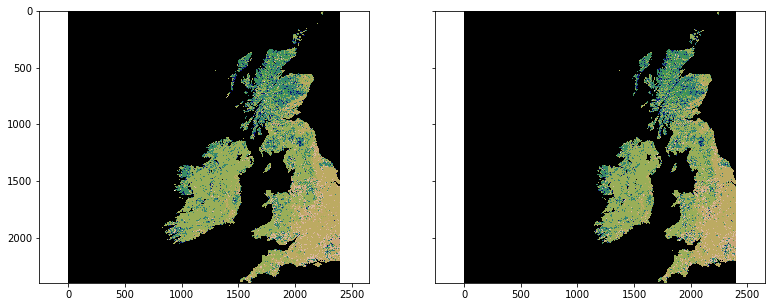

In [16]:
g = gdal.Open ( "lc_h17v03_wgs84.tif" )
wgs84 = g.ReadAsArray()
g = gdal.Open("test_lc_h17v03.img")
modis = g.ReadAsArray()
fig, axs = plt.subplots(nrows=1, ncols=2, 
                        sharex=True, sharey=True, figsize=(13, 5))

axs[0].imshow ( modis, interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth )
axs[1].imshow ( wgs84, interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth )

<div class="alert alert-block alert-success">
1. Create a method that reprojects from a rasters original projection to an arbitrary one
2. Check with e.g. the OS projection for the UK (remember the EPSG code for this is 27700)

</div>

## Creating a mask from a vector

Suppose in the previous example that one is only interested in Ireland. How could you ignore the pixels that don't believe to the UK? One way to go around that would be if we had a vector with the country boundaries, then we could select the pixels that fall within Ireland, and create a binary mask of the same size as our map with `True` within Ireland and `False` otherwise.

Predictably, GDAL can do this. We will use a [global map of countries](http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip) provided as a zipped shapefile. You can download that file using requests as here:

In [17]:
import requests
r = requests.get ("http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/" +
                  "cultural/ne_110m_admin_0_countries.zip")
if r.ok:
    with open("data/ne_110m_admin_0_countries.zip", 'w') as fp:
        fp.write(r.content)
        

But if you can't be bothered, you can also open [remote zipped files with GDAL](http://gdal.org/gdal_virtual_file_systems.html). Given this is a zipfile, we can use the command line tool `ogrinfo` to see the contents of the file and, in particular, the layers it contains. Basically, we build the filename as 

```
/vsizip/vsicurl/<remote_filename.zip>/<file_inside_zipfile>
```

We get a few warnings, but...

In [18]:
!ogrinfo -al -so \
 /vsizip/vsicurl/http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip/ne_110m_admin_0_countries.shp

ERROR 1: Random access not supported for /vsizip
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
ERROR 1: Random access not supported for /vsizip
Warning 4: Failed to open /vsizip/vsicurl/http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip/ne_110m_admin_0_countries.shp, No such file or directory.
Warning 1: Recode from CP437 to UTF-8 

We see that we can basically filter when the `NAME` attribute is equal to the country name. On the shell, we can see what information is available on ireland by filtering:

In [19]:
!ogrinfo -al -where "NAME='IRELAND'" \
    /vsizip/vsicurl/http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip/ne_110m_admin_0_countries.shp


ERROR 1: Random access not supported for /vsizip
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
Warning 1: Recode from CP437 to UTF-8 failed with the error: "Invalid argument".
ERROR 1: Random access not supported for /vsizip
Warning 4: Failed to open /vsizip/vsicurl/http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip/ne_110m_admin_0_countries.shp, No such file or directory.
Warning 1: Recode from CP437 to UTF-8 

The associated polygon is a polygon describing the borders of Ireland. We want to rasterise that polygon to provide a mask for e.g. `lc_h17v03_wgs84.tif` (the Lat/Long projection you created earlier). To do this, we need to extract information about

1. The projection of the raster
2. The extent of the raster
3. The number of rows and columns
4. A value for pixels outside our region of interest (say 0)
5. A value for pixels inside our region of itnerest (say 1)

We will extract the relevant information in what follows


In [20]:
g = gdal.Open("lc_h17v03_wgs84.tif")
proj = g.GetProjectionRef()
geoT = g.GetGeoTransform()
xs = []
ys = []
for x,y in [ [0, 0], [0, g.RasterYSize], [g.RasterXSize, g.RasterYSize], [g.RasterXSize, 0]]:
    xx, yy = gdal.ApplyGeoTransform(geoT, x,y)
    xs.append(xx)
    ys.append(yy)
extent = [min(xs), min(ys), max(xs), max(ys)]
xRes = geoT[1]
yRes = geoT[-1]
nx = g.RasterXSize
ny = g.RasterYSize

gg = gdal.Rasterize("data/lc_h17v03_wgs84_ireland.tif", "/vsizip/" +
               "data/ne_110m_admin_0_countries.zip/ne_110m_admin_0_countries.shp",
                format="GTiff", xRes=xRes, yRes=yRes, where="NAME='Ireland'",
                outputBounds=[min(xs), min(ys), max(xs), max(ys)], 
                width=nx, height=ny, noData=0, burnValues=1)
if gg is not None:
    print "Done!"

Done!


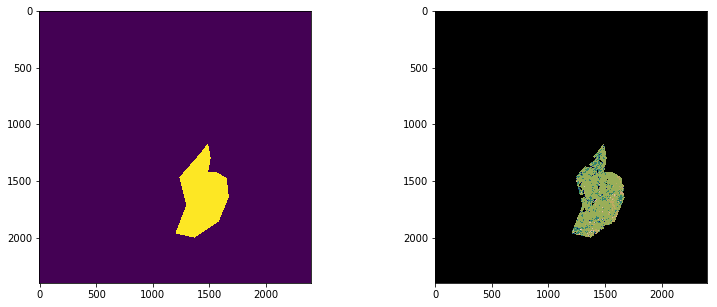

In [21]:
mask = gg.ReadAsArray()
g = gdal.Open ( "lc_h17v03_wgs84.tif" )
wgs84 = g.ReadAsArray()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
axs[0].imshow(mask, interpolation="nearest")
axs[1].imshow((1.*mask)*wgs84, interpolation="nearest", cmap=plt.cm.gist_earth)


That was using the lowest resolution map. Let's use something a bit better... There's a higher resolution map available from 
[]http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip](http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip). We'll download it if it's not available in your `data/` folder, and do the same as above..

Done!


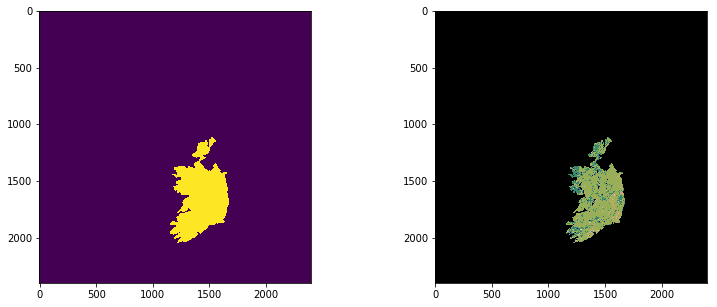

In [22]:
import os
if not os.path.exists("data/ne_50m_admin_0_countries.zip"):
    r = requests.get ("http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/"
                      + "cultural/ne_50m_admin_0_countries.zip")
    if r.ok:
        with open("data/ne_50m_admin_0_countries.zip", 'w') as fp:
            fp.write(r.content)
g = gdal.Open("lc_h17v03_wgs84.tif")
proj = g.GetProjectionRef()
geoT = g.GetGeoTransform()
xs = []
ys = []
for x,y in [ [0, 0], [0, g.RasterYSize], [g.RasterXSize, g.RasterYSize], [g.RasterXSize, 0]]:
    xx, yy = gdal.ApplyGeoTransform(geoT, x,y)
    xs.append(xx)
    ys.append(yy)
extent = [min(xs), min(ys), max(xs), max(ys)]
xRes = geoT[1]
yRes = geoT[-1]
nx = g.RasterXSize
ny = g.RasterYSize

gg = gdal.Rasterize("data/lc_h17v03_wgs84_ireland.tif", "/vsizip/" +
               "data/ne_50m_admin_0_countries.zip/ne_50m_admin_0_countries.shp",
                format="GTiff", xRes=xRes, yRes=yRes, where="NAME='Ireland'",
                outputBounds=[min(xs), min(ys), max(xs), max(ys)], 
                width=nx, height=ny, noData=0, burnValues=1)
if gg is not None:
    print "Done!"
    
mask = gg.ReadAsArray()
g = gdal.Open ( "lc_h17v03_wgs84.tif" )
wgs84 = g.ReadAsArray()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
axs[0].imshow(mask, interpolation="nearest")
axs[1].imshow((1.*mask)*wgs84, interpolation="nearest", cmap=plt.cm.gist_earth)